In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
nltk.download('stopwords')
import re
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('words')
from nltk.corpus import words
setofwords = set(words.words())
from sklearn.metrics import roc_auc_score

from sklearn.feature_extraction.text import CountVectorizer



x_train_df = pd.read_csv('data_reviews/x_train.csv')
y_train_df = np.loadtxt('data_reviews/y_train.csv', delimiter=',', skiprows=1)
x_test = pd.read_csv('data_reviews/x_test.csv')


tr_text_list = x_train_df['text'].values.tolist()
x_test_list = x_test['text'].values.tolist()

a_file = open("data_reviews/stops.txt")
file_contents = a_file.read()
stopwords = file_contents.splitlines()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewcrofts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/andrewcrofts/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Part 0: Pre-Pre Processing

In [3]:
import string

#pre process, remove all punctuation, and other things

l = len(tr_text_list)
for i in range(0,l): 
    a = tr_text_list[i]
    tr_text_list[i] = a.translate(str.maketrans('', '', string.punctuation))

    


In [4]:
#x test tokenizer

print(len(x_test_list))

print(x_test_list[5][146])



l = len(x_test_list)
arr = []
for i in range(0,l):
    #remove punctuation
    a = x_test_list[i]
    x_test_list[i] = a.translate(str.maketrans('', '', string.punctuation))
    
    #lowercase all characters
    #a2 = len(a)
   # print(a2)
    #st = ""
   # for j in range(0,a2):
        #print(j)
    #    st += x_test[i][j].lower()
    #arr.append(st)
   # print("DONE")
    
#x_test = arr

print(type(x_test_list))


#pd.DataFrame(x_test.toarray(), columns=count_vectorizer.get_feature_names_out())

#TODO:remove numbers and super rare words possibly

600
e
<class 'list'>


In [5]:


def stop_stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    # remove stops using nltk

    stops = stopwords
    words = [w for w in words if ((w not in stops) and (w in setofwords))]
    
    # stem the remaining words after removing stops; 
    # what happens if we do this *before* removing stops?
    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    
    return words









# Part 0.5: Testing Infrastructure

In [6]:
def k_fold_split(arr,k):
    l = len(arr)
    split = int(round(l/k))
    
    # test , train
    return arr[:split] , arr[split:]


In [7]:
a = np.zeros(999)
print(len(a))
a1,a2 = k_fold_split(a,2)
print(len(a1), len(a2))

iters = np.logspace(1, 5, base=1.5, num=35)
iters = [float(x) for x in iters]
print(iters)

999
500 499
[1.5, 1.5732867233996144, 1.6501540760169964, 1.7307769995741988, 1.8153389830636713, 1.9040324803492208, 1.9970593481700438, 2.0946313055446786, 2.196970415620429, 2.3043095910649023, 2.416893124149871, 2.534977242733871, 2.658830693408907, 2.788735353138416, 2.9249868707785365, 3.067895339942703, 3.217786004740934, 3.375, 3.539895127649132, 3.7128466710382417, 3.894248249041947, 4.08451271189326, 4.284073080785747, 4.493383533382599, 4.7129204374755265, 4.943183435145965, 5.1846965798960305, 5.438009529337207, 5.70369879615121, 5.982369060170042, 6.274654544561436, 6.581220459251706, 6.902764514871082, 7.240018510667103, 7.59375]


# Part 1: Creating Classifiers

In [23]:
#first attempt, vanilla, no preprocessing

print(len(tr_text_list))
i = 106
x_split,x_train = k_fold_split(tr_text_list,i)
y_split,y_train = k_fold_split(y_train_df,i)

print(len(x_train), len(x_split))

count_vectorizer = CountVectorizer()

x = count_vectorizer.fit_transform(x_train)
x_train = pd.DataFrame(x.toarray(), columns=count_vectorizer.get_feature_names_out())

xl = count_vectorizer.transform(x_split)
x_split = pd.DataFrame(xl.toarray(), columns=count_vectorizer.get_feature_names_out())


xt = count_vectorizer.transform(x_test_list)
x_test = pd.DataFrame(xt.toarray(), columns=count_vectorizer.get_feature_names_out())

2400
2377 23


In [24]:
def temp_class(i):
    x_split,x_train = k_fold_split(tr_text_list,i)
    y_split,y_train = k_fold_split(y_train_df,i)
    
    
    count_vectorizer = CountVectorizer()

    x = count_vectorizer.fit_transform(x_train)
    x_train = pd.DataFrame(x.toarray(), columns=count_vectorizer.get_feature_names_out())

    xl = count_vectorizer.transform(x_split)
    x_split = pd.DataFrame(xl.toarray(), columns=count_vectorizer.get_feature_names_out())

    return x_train,y_train,x_split,y_split
    

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

i = 111
tempx1,tempx2 = k_fold_split(tr_text_list,i)
tempy1,tempy2 = k_fold_split(y_train_df,i)



tf_vectorizer = TfidfVectorizer(tokenizer=stop_stemming_tokenizer, use_idf=False)
x2 = tf_vectorizer.fit_transform(tempx2)
x_train2 = pd.DataFrame(x2.toarray(), columns=tf_vectorizer.get_feature_names_out())

xl2 = tf_vectorizer.transform(tempx1)
x_split2 = pd.DataFrame(xl2.toarray(), columns=tf_vectorizer.get_feature_names_out())


#print(x_train2)
xt2 = tf_vectorizer.transform(x_test_list)
x_test2 = pd.DataFrame(xt2.toarray(), columns=tf_vectorizer.get_feature_names_out())

#print(len(x_split2))
#print(len(tempy2))

In [35]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'liblinear',random_state=100, penalty = 'elasticnet').fit(x_train, y_train)
print(clf.score(x_split,y_split))
print(clf.score(x_train, y_train))

print(len(x_test))

clf2 = LogisticRegression(random_state=10).fit(x_train2, tempy2)
x_split2,tempy1
print(clf2.score(x_split2,tempy1))

yproba1_test = clf.predict(x_test)
np.savetxt('yproba1_test.txt', yproba1_test)

0.8695652173913043
0.976861590239798
600
0.7727272727272727


In [47]:
iters = np.logspace(-2, 0, base=10, num=4)
print(iters)
iters = [int(x) for x in iters]
scores2 = []

for i in range(0,15):
    #clf3 = MLPClassifier(solver='lbfgs', alpha=alphas[i], hidden_layer_sizes=(5, 2), random_state=1)
    clf = LogisticRegression(solver = 'saga', random_state=100, penalty = 'elasticnet', l1_ratio = iters[i], max_iter = 400).fit(x_train, y_train)
    clf.fit(x_train, y_train)
    scores2.append(clf.score(x_split,y_split))
    print("doned",i)


[0.01       0.04641589 0.21544347 1.        ]
doned 0
doned 1
doned 2


/opt/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


doned 3


/opt/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


IndexError: list index out of range

Text(0, 0.5, 'Model Score')

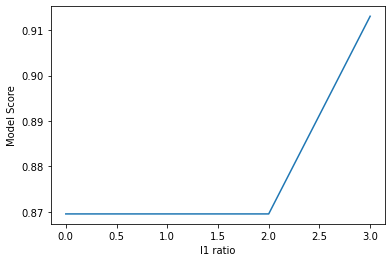

In [48]:
plt.plot(scores2)
plt.xlabel("l1 ratio")
plt.ylabel("Model Score")

In [150]:

iters = np.logspace(11, 12, base=1.5, num=55)
iters = [float(x) for x in iters]
print(iters)

scores = []
for i in iters:
    x_traint,y_traint,x_splitt,y_splitt = temp_class(i)
    clf = LogisticRegression(solver = 'newton-cg',random_state=10).fit(x_traint, y_traint)
    scores.append(clf.score(x_splitt,y_splitt))
    print("done")


[86.49755859375, 87.14947974541307, 87.80631434428655, 88.46809942240034, 89.13487229088985, 89.80667054209987, 90.48353205170386, 91.16549498083965, 91.85259777826055, 92.5448791825032, 93.24237822407194, 93.94513422763887, 94.65318681426116, 95.36657590361509, 96.08534171624625, 96.80952477583749, 97.53916591149346, 98.27430626004279, 99.01498726835699, 99.76125069568741, 100.51313861601976, 101.27069342044588, 102.03395781955389, 102.80297484583642, 103.57778785611633, 104.35844053399147, 105.14497689229732, 105.93744127558878, 106.73587836263982, 107.54033316896268, 108.35085104934602, 109.1674777004116, 109.99025916319083, 110.81924182572077, 111.65447242565902, 112.49599805291906, 113.34386615232502, 114.19812452628689, 115.05882133749515, 115.92600511163634, 116.79972474012928, 117.6800294828809, 118.56696897106394, 119.46059320991492, 120.36095258155373, 121.26809784782371, 122.18208015315375, 123.10295102744209, 124.03076238896104, 124.96556654728435, 125.90741620623669, 126.8

28
106.73587836263982


Text(0, 0.5, 'Model Score')

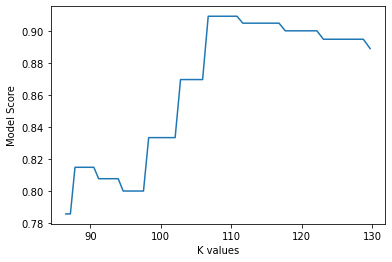

In [152]:
plt.plot(iters,scores)
print(scores.index(max(scores)))

print(iters[28])
plt.xlabel("K values")
plt.ylabel("Model Score")

# Part 2: Neural Network

In [185]:
#Neural Network Model #1 : Sklearn Docs Demo
from sklearn.neural_network import MLPClassifier


#find optimal alpha
alphas = np.logspace(-6, 2, base=10, num=20)
scores = []
for i in range(0,20):
    #clf3 = MLPClassifier(solver='lbfgs', alpha=alphas[i], hidden_layer_sizes=(5, 2), random_state=1)
    clf3 = MLPClassifier(hidden_layer_sizes=(10,), alpha = alphas[i] ,max_iter=600, random_state=13)
    clf3.fit(x_train, y_train)
    scores.append(clf3.score(x_split,y_split))
    print("done")


#k fold test
#clf3.score(x_split,y_split)

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


0.8695652173913043
12
0.0008858667904100823


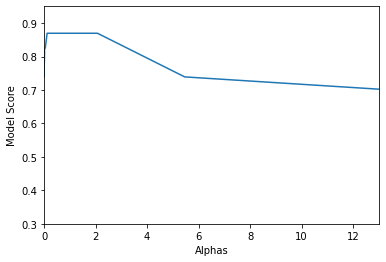

In [191]:
plt.plot(alphas,scores)
plt.xlabel("Alphas")
plt.ylabel("Model Score")
plt.ylim([.3,.95])
plt.xlim(0,13)


print(max(scores))
print(scores.index(max(scores)))
print(alphas[7])

In [198]:
iters = np.logspace(2, 5, base=10, num=15)
iters = [int(x) for x in iters]
scores2 = []

for i in range(0,15):
    #clf3 = MLPClassifier(solver='lbfgs', alpha=alphas[i], hidden_layer_sizes=(5, 2), random_state=1)
    clf3 = MLPClassifier(hidden_layer_sizes=(10,), alpha = .01 ,max_iter=iters[i], random_state=13)
    clf3.fit(x_train, y_train)
    scores2.append(clf3.score(x_split,y_split))
    print("done",i)



/opt/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


done 0


/opt/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (163) reached and the optimization hasn't converged yet.
  warnings.warn(


done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14


(0.6, 0.95)

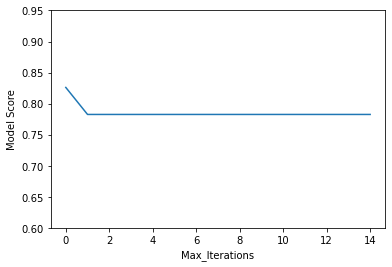

In [199]:
plt.plot(scores2)
plt.xlabel("Max_Iterations")
plt.ylabel("Model Score")
plt.ylim([.6,.95])



In [192]:
clf2 = MLPClassifier(solver='lbfgs', alpha=.01,max_iter=400, hidden_layer_sizes=(10,), random_state=100)
clf2.fit(x_train, y_train)
clf3 = MLPClassifier(hidden_layer_sizes=(10,), alpha = .0088 ,max_iter=1200, random_state=13)
clf3.fit(x_train2, tempy2)
#400 should be plenty

print(clf2.score(x_split,y_split))
print(clf3.score(x_split2,tempy1))


yproba1_test = clf3.predict(x_test2)
np.savetxt('yproba1_test.txt', yproba1_test)


0.8695652173913043
0.8636363636363636


In [208]:
iters = np.logspace(11, 12, base=1.5, num=15)
iters = [float(x) for x in iters]
print(iters)

scores = []
for i in iters:
    x_traint,y_traint,x_splitt,y_splitt = temp_class(i)
    clf = clf3 = MLPClassifier(hidden_layer_sizes=(10,), alpha = .0088 ,max_iter=600, random_state=13).fit(x_traint, y_traint)
    scores.append(clf.score(x_splitt,y_splitt))
    print("done")

[86.49755859375, 89.0393122273173, 91.65575596357401, 94.34908459093951, 97.12155739227128, 99.97550004005092, 102.91330654726102, 105.93744127558878, 109.05044100264125, 112.25491704990633, 115.55355747324437, 118.94912931774813, 122.44448093886196, 126.04254439170838, 129.746337890625]
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


11


Text(0, 0.5, 'Model Score')

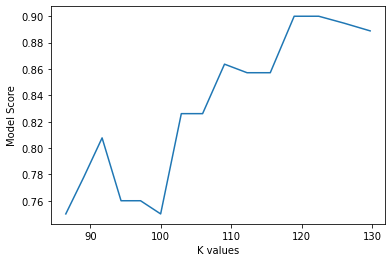

In [210]:
plt.plot(iters,scores)
print(scores.index(max(scores)))

#print(iters[28])
plt.xlabel("K values")
plt.ylabel("Model Score")

In [ ]:
#Neural Network Model #2 : Marty's demo implementation
#TODO: mess with parameters
print(len(x_train2))
print(len(y_train))

network = MLPClassifier(solver='adam', alpha=.008,max_iter=14000, hidden_layer_sizes=(10,), random_state=100)
network.fit(x_train2, tempy2)
print(network.score(x_train2, tempy2))
#k fold test
print(network.score(x_split2,tempy1))


#network.get_params()

In [90]:
#TODO: VERY IMPORTANT: retrain with whole(unsplit) data set

yproba1_test = network.predict(x_test2)
np.savetxt('yproba1_test.txt', yproba1_test)


# Part 3: SVM or Something....

In [212]:
from sklearn import svm

clf4 = svm.SVC()
clf4.fit(x_train, y_train)

print(clf4.score(x_split,y_split))


#yproba1_test = clf4.predict(x_test)
#np.savetxt('yproba1_test.txt', yproba1_test)

0.8260869565217391


In [213]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV


parameters = {'kernel':('linear', 'sigmoid','rbf'), 'C':[1, 10], 'gamma':('scale', 'auto'), 'shrinking':(True,False)}
svc = svm.SVC()
grid = GridSearchCV(svc, parameters)
grid.fit(x_train, y_train)
print(grid.score(x_split,y_split))

0.782608695652174


In [135]:
yproba1_test = grid.predict(x_test)
np.savetxt('yproba1_test.txt', yproba1_test)